In [2]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
# %matplotlib inline
%matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'text.fontsize': 14,
          'legend.fontsize': 10,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

/shared/users/asousa/software/python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import re
from load_sim_constants import load_sim_constants

# ------------------------------------------------
# Loads all pN, pS files in a directory, sorted by frequency
# returns: pN, pS (nFreqs x nTimes x nEnergies numpy arrays)
# ------------------------------------------------
def load_pfiles(directory, L, fmin=0, fmax=10e10):
    # Get files, frequencies:
    d = os.listdir(directory)


    freqs_pN = []
    freqs_pS = []
    l_pN = []
    l_pS = []

    p = re.compile("\d+")
    for s in d:
        if s.endswith(".dat"):
            if s.startswith('pN'):
                tmp = p.findall(s)
                freqs_pN.append(int(tmp[0]))
                l_pN.append(float(tmp[1]))

            elif s.startswith('pS'):
                tmp = p.findall(s)
                freqs_pS.append(int(tmp[0]))
                l_pS.append(float(tmp[1]))

    freqs_pN.sort()
    freqs_pS.sort()

    # print l_pN
    assert freqs_pN == freqs_pS, "frequency mismatch!"

    freqs = freqs_pN

    #Pre-allocate
    pN = np.zeros((len(freqs), sc.NUM_E, sc.NUM_STEPS))
    pS = np.zeros((len(freqs), sc.NUM_E, sc.NUM_STEPS))


    # Binary files -- little endian, four-byte floats
    dt = np.dtype('<f4')

    # for f, l in zip(freqs, l_pN):
    for f_ind, f in enumerate([ff for ff in freqs if ff > fmin and ff < fmax]):

        # for binary-formatted files
#         print "f: ", f
#         print "ind: ",f_ind
        #         print L
#         print os.path.join(directory,'pN%d_%g.dat'%(f,L))
        tmp_N = np.fromfile(os.path.join(directory,'pN%d_%g.dat'%(f,L)),dtype=np.dtype('<f4'))
#         print np.shape(tmp_N)
#         print sc.NUM_E*sc.NUM_STEPS
        if (np.shape(tmp_N)[0]==sc.NUM_E*sc.NUM_STEPS):
            pN[f_ind, :,:] = tmp_N.reshape(sc.NUM_E, sc.NUM_STEPS, order='c')
        else:
            print "no N data at %d"%f 
        tmp_S = np.fromfile(os.path.join(directory,'pS%d_%g.dat'%(f,L)),dtype=np.dtype('<f4'))
        if (np.shape(tmp_S)[0]==sc.NUM_E*sc.NUM_STEPS):
            pS[f_ind, :,:] = tmp_S.reshape(sc.NUM_E, sc.NUM_STEPS, order='c')
        else:
            print "no S data at %d"%f
        # For ASCII-formatted files
#         pN.append(np.loadtxt(os.path.join(directory,"pN%d_%d.dat"%(f,L))))
#         pS.append(np.loadtxt(os.path.join(directory,"pS%d_%d.dat"%(f,L))))
        
    #print np.shape(pN)
    #print np.shape(pS)
    return pN, pS

failed: sc.T_STEP = (1.0*((1.0*T_MAX)/NUM_STEPS))
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


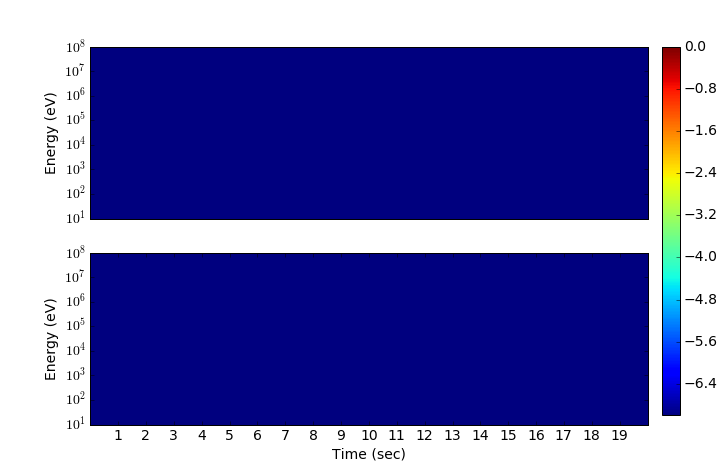

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


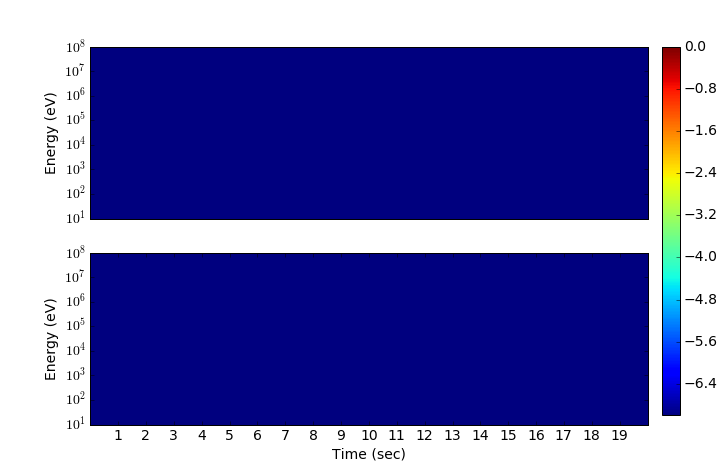

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


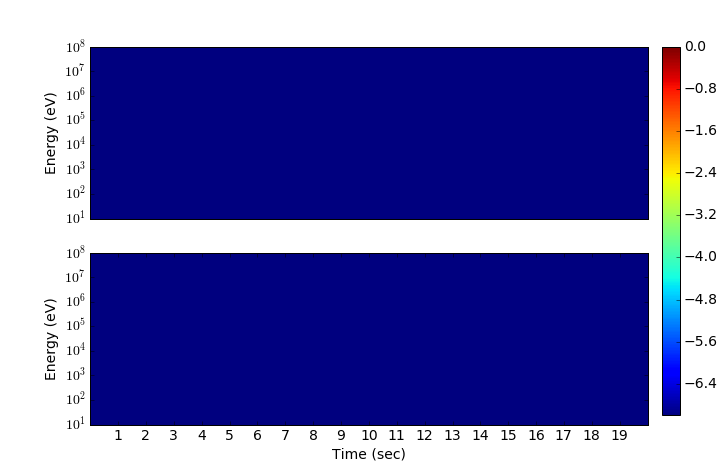

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


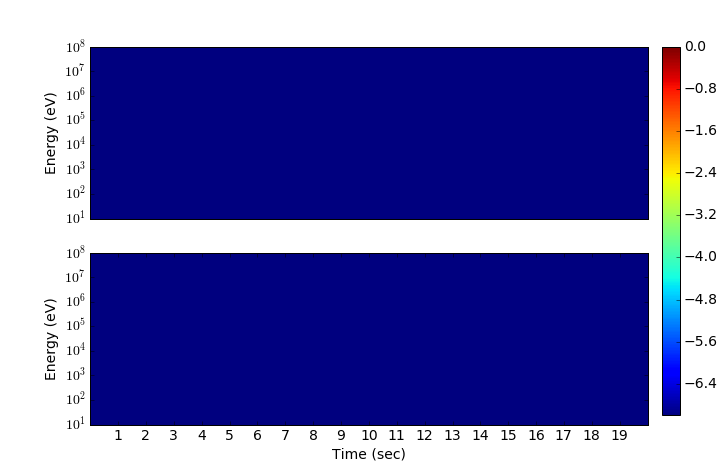

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


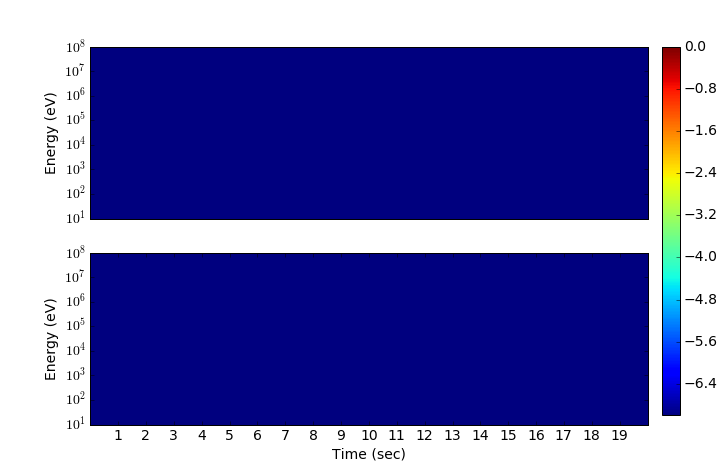

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


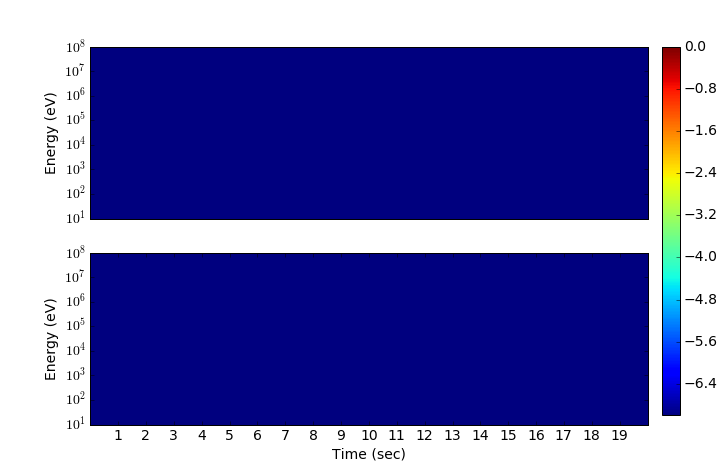

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


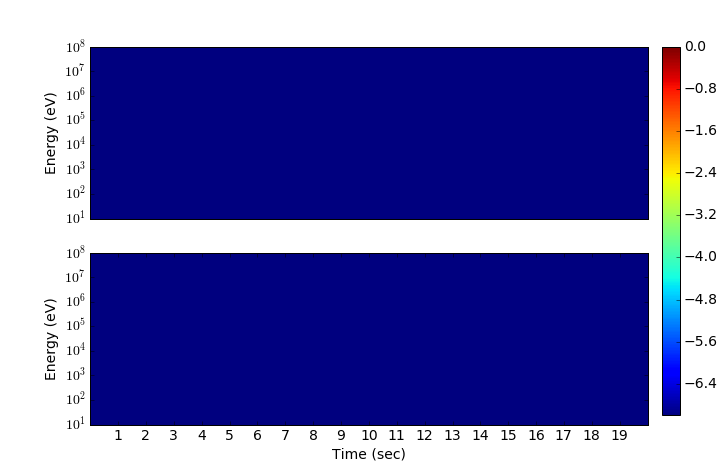

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


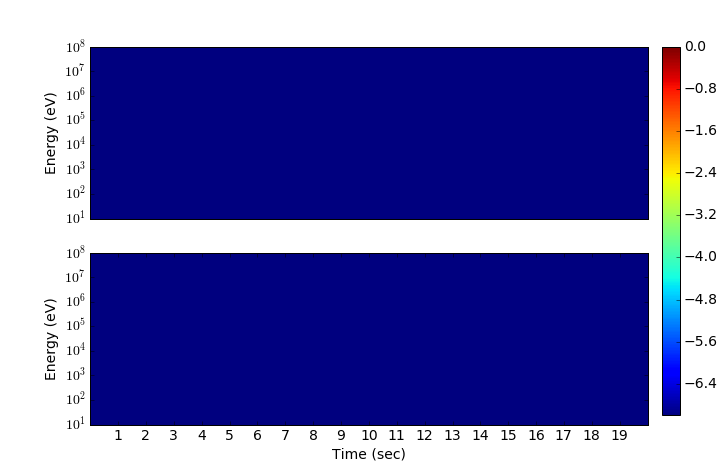

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


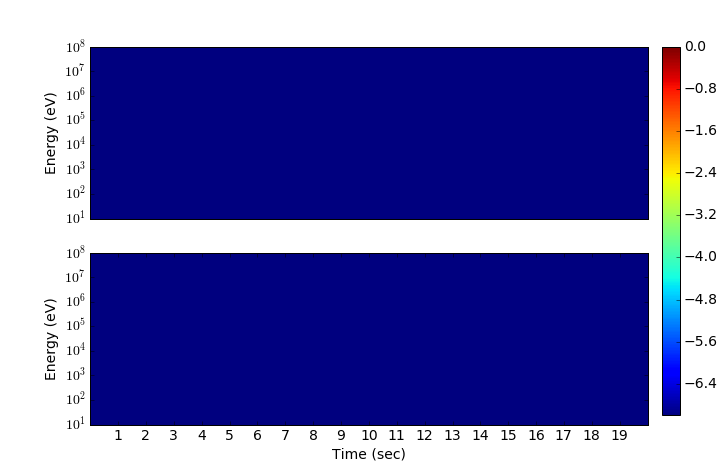

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


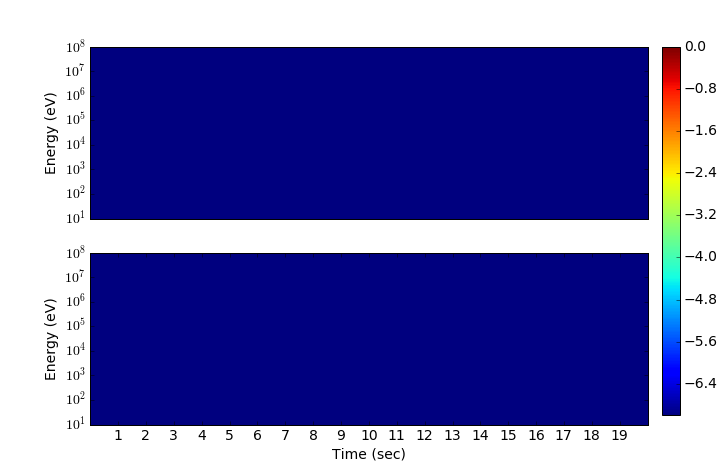

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


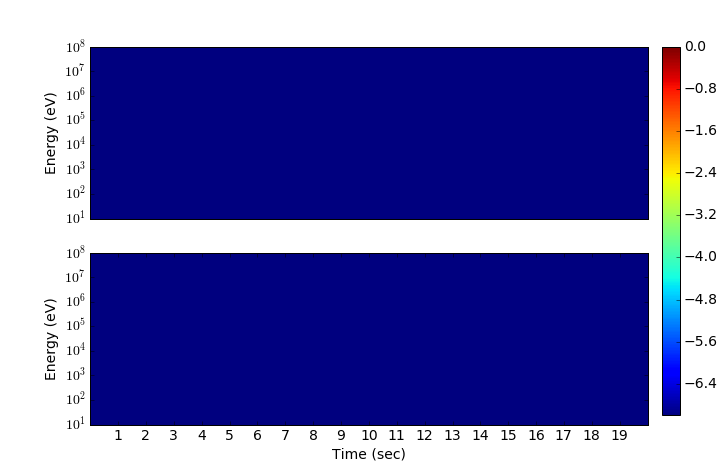

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


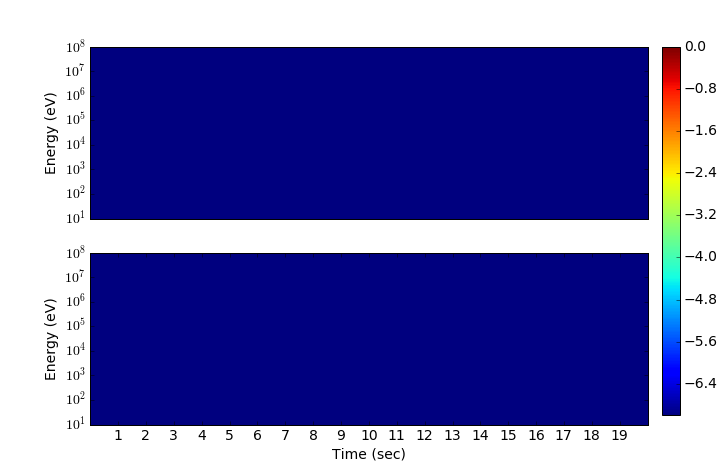

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.0
Max S (deg):  0.0


<IPython.core.display.Javascript object>


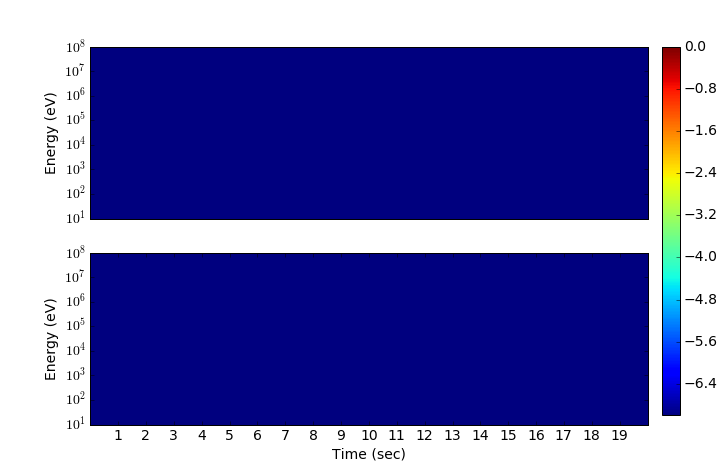

-7.0
-7.0
0.0
0
(32, 512, 2000)
Max N (deg):  0.000247628913054
Max S (deg):  0.0219383145639


<IPython.core.display.Javascript object>


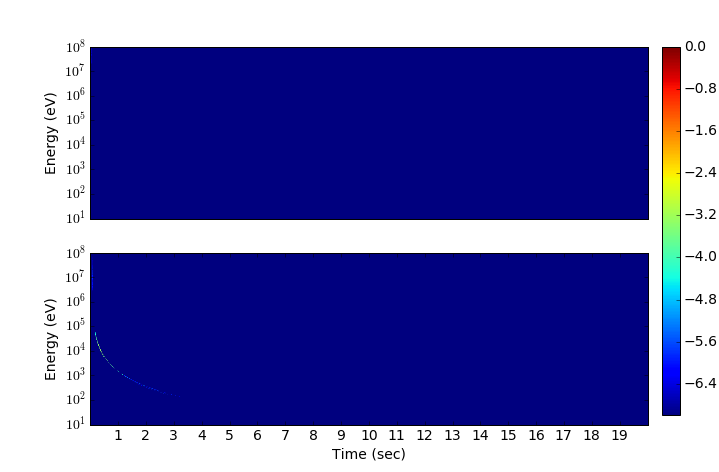

-4.918520178
-7.0
0.000598058802308
359
(32, 512, 2000)
Max N (deg):  0.000430112545594
Max S (deg):  0.0316420896232


<IPython.core.display.Javascript object>


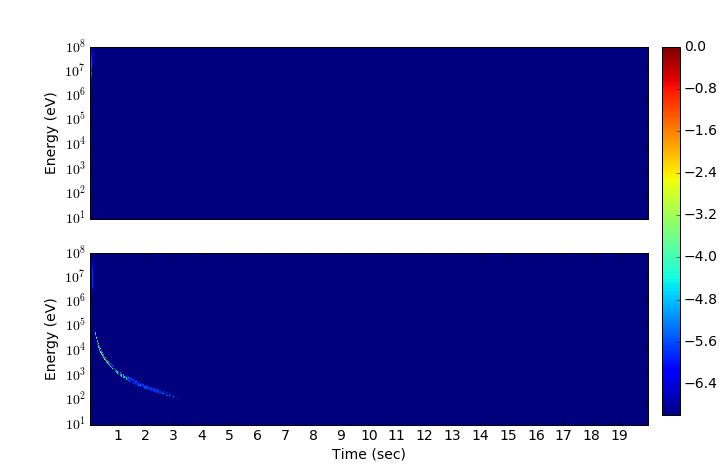

-4.69712762074
-7.0
0.000851006980241
1140
(32, 512, 2000)
Max N (deg):  0.000625753072957
Max S (deg):  0.0610228778783


<IPython.core.display.Javascript object>


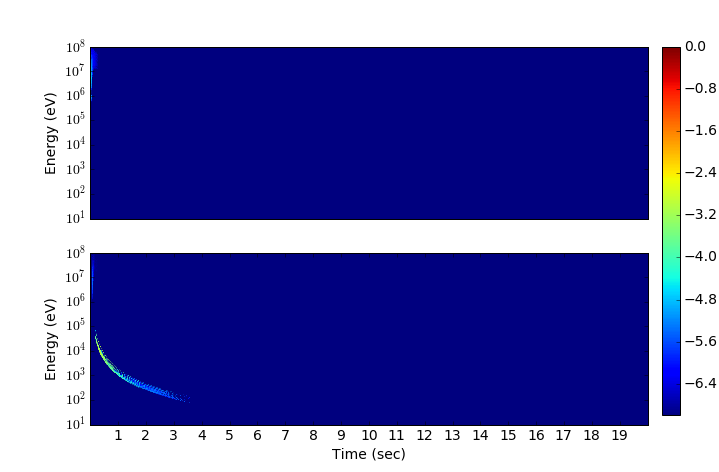

-4.50331617141
-7.0
0.00178528386824
2084
(32, 512, 2000)
Max N (deg):  0.00152917694609
Max S (deg):  0.112494289711


<IPython.core.display.Javascript object>


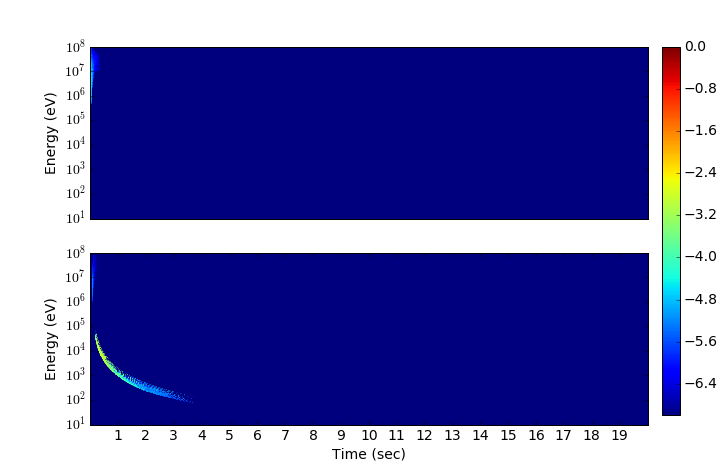

-4.15963266773
-7.0
0.00295845122823
3231
(32, 512, 2000)
Max N (deg):  0.00204200302295
Max S (deg):  0.24422657512


<IPython.core.display.Javascript object>

-4.02745426275
-7.0
0.00707207223614
4445
(32, 512, 2000)
Max N (deg):  0.0031303362454
Max S (deg):  0.355995980399


<IPython.core.display.Javascript object>


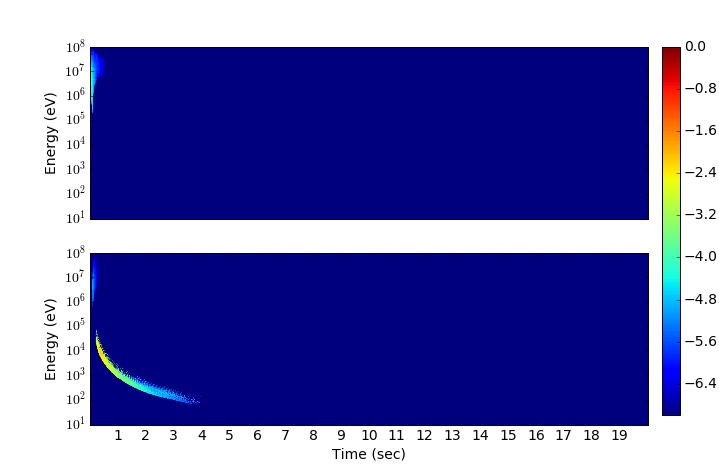

-3.89131709749
-7.0
0.0095786924971
5555
(32, 512, 2000)
Max N (deg):  0.0465476084026
Max S (deg):  0.547088907041


<IPython.core.display.Javascript object>

-3.09022526039
-7.0
0.0148967641519
7820
(32, 512, 2000)
Max N (deg):  0.0854700518901
Max S (deg):  0.836449402376


<IPython.core.display.Javascript object>


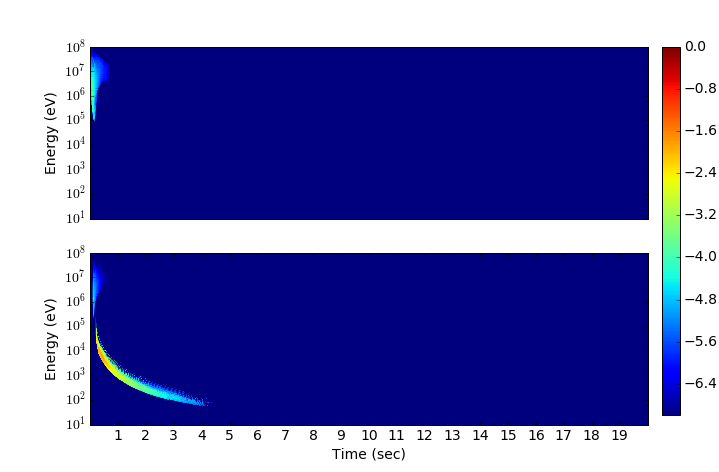

-2.82497737338
-7.0
0.0214676588316
9378
(32, 512, 2000)
Max N (deg):  0.19976076393
Max S (deg):  1.58277954417


<IPython.core.display.Javascript object>


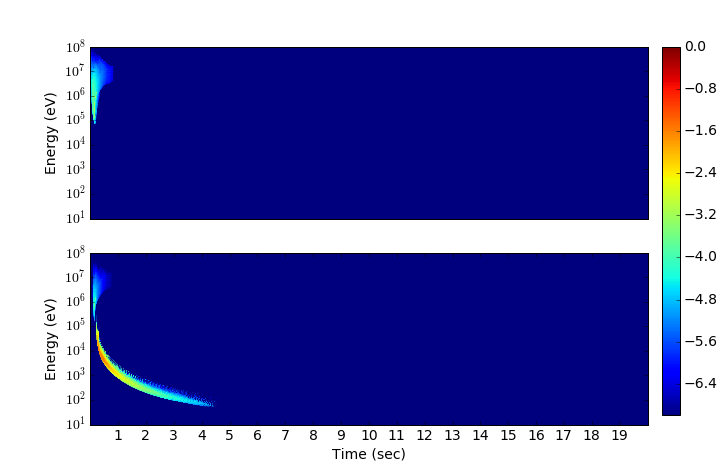

-2.45722407502
-7.0
0.0370523263167
15367
(32, 512, 2000)
Max N (deg):  0.479345253859
Max S (deg):  4.09830464668


<IPython.core.display.Javascript object>


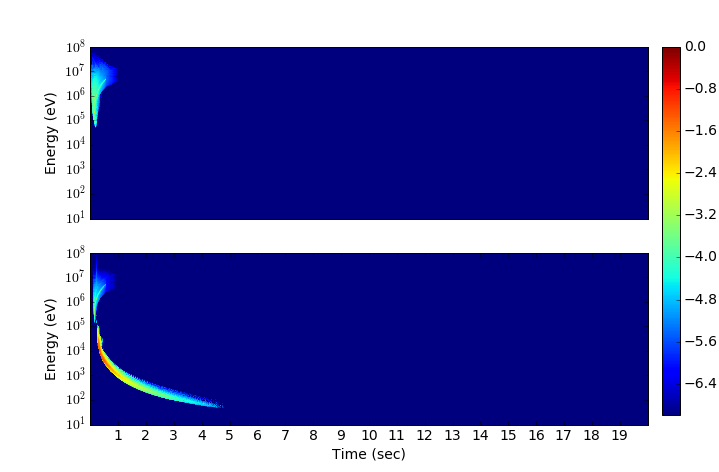

-2.07723097461
-7.0
0.0793548968542
105334
(32, 512, 2000)
Max N (deg):  0.967382537591
Max S (deg):  8.23564685313


<IPython.core.display.Javascript object>


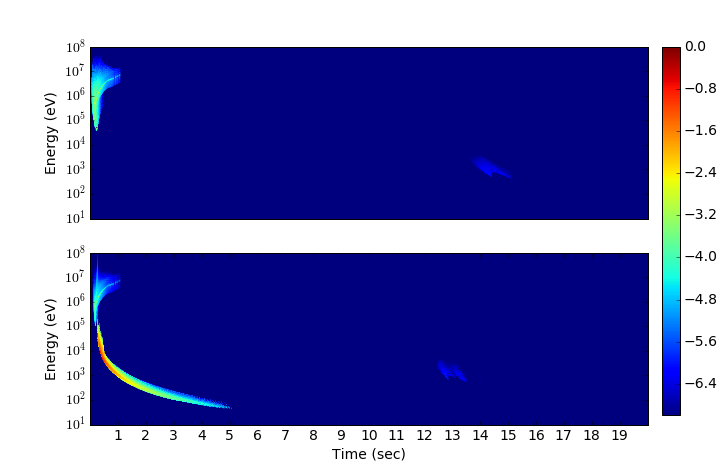

-1.77231903925
-7.0
0.16482422061
220130
(32, 512, 2000)
Max N (deg):  1.09961804424
Max S (deg):  7.38794458534


<IPython.core.display.Javascript object>


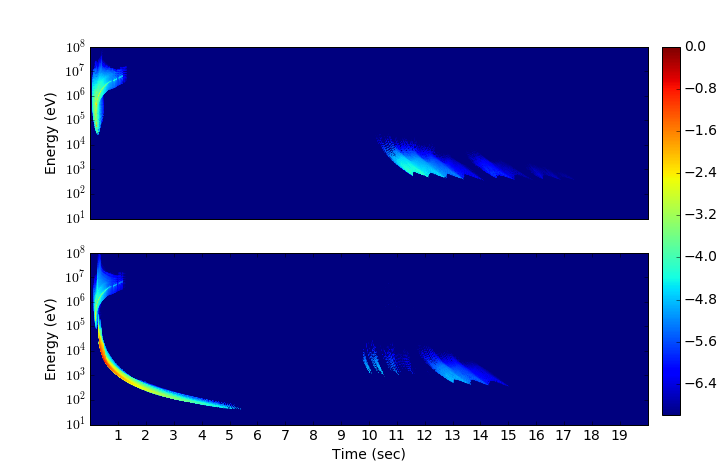

-1.71656678812
-7.0
0.182807518359
322881
(32, 512, 2000)
Max N (deg):  1.1678698245
Max S (deg):  5.47844985844


<IPython.core.display.Javascript object>


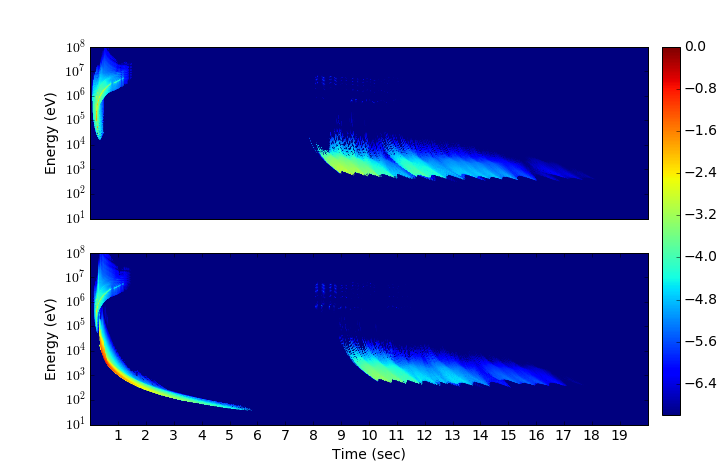

-1.69035975993
-7.0
0.163428288479
396495
(32, 512, 2000)
Max N (deg):  1.03302039913
Max S (deg):  4.70645472772


<IPython.core.display.Javascript object>


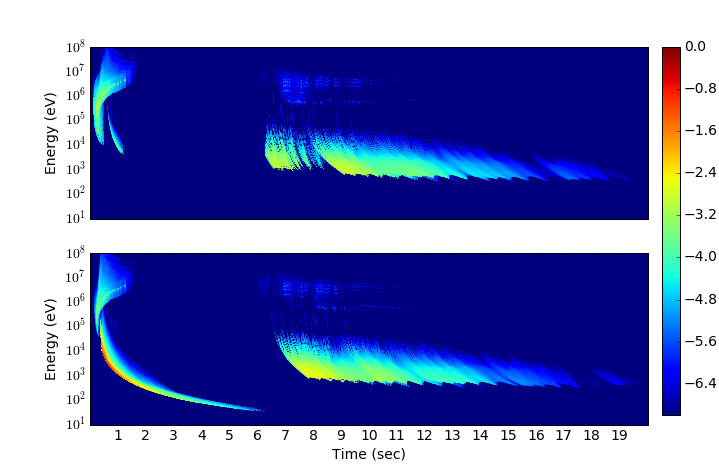

-1.72435129906
-7.0
0.129595470385
464913
(32, 512, 2000)
Max N (deg):  0.688142645607
Max S (deg):  3.40940917039


<IPython.core.display.Javascript object>


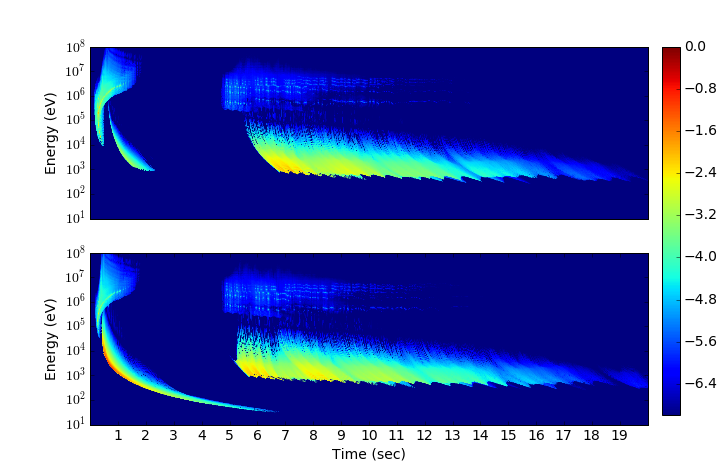

-1.91997683251
-7.0
0.0954561077168
511958
(32, 512, 2000)
Max N (deg):  0.987146702514
Max S (deg):  2.80454448447


<IPython.core.display.Javascript object>


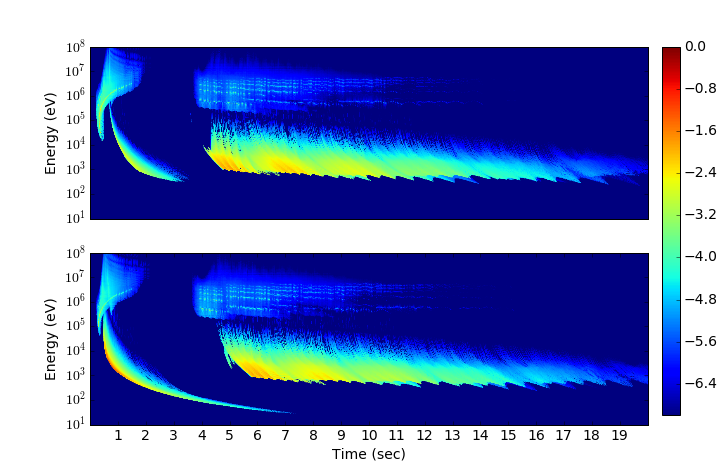

-1.76374093328
-7.0
0.066391043377
557111
(32, 512, 2000)
Max N (deg):  1.19745740434
Max S (deg):  1.40569213978


<IPython.core.display.Javascript object>


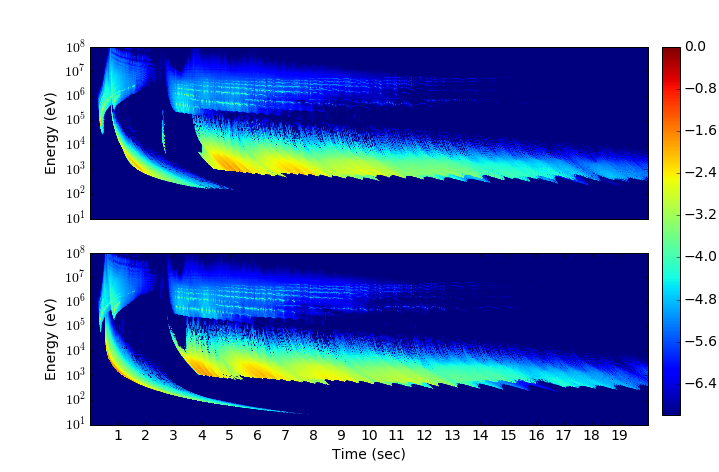

-1.67223522192
-7.0
0.0345090582881
589846
(32, 512, 2000)
Max N (deg):  1.31844681391
Max S (deg):  1.08836897044


<IPython.core.display.Javascript object>


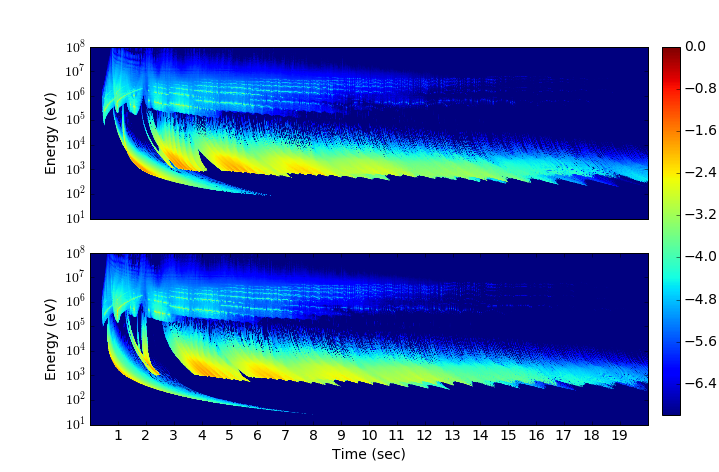

-1.63806001735
-7.0
0.0194328403057
618731
(32, 512, 2000)
Max N (deg):  1.1551702053
Max S (deg):  1.21888097689


<IPython.core.display.Javascript object>

-1.69547665357
-7.0
0.0218095773488
610055
(32, 512, 2000)
Max N (deg):  0.93846282367
Max S (deg):  0.946524009338


<IPython.core.display.Javascript object>

-1.78570554675
-7.0
0.0194232668201
593042
(32, 512, 2000)
Max N (deg):  0.729994814816
Max S (deg):  0.616171372515


<IPython.core.display.Javascript object>

-1.89120586655
-7.0
0.014095921432
569583
(32, 512, 2000)
Max N (deg):  0.535963717051
Max S (deg):  0.483535468722


<IPython.core.display.Javascript object>

-1.95983047971
-7.0
0.00843929199614
542586
(32, 512, 2000)
Max N (deg):  0.326670365539
Max S (deg):  0.360646025667


<IPython.core.display.Javascript object>

-2.16266568868
-7.0
0.00635026972221
514410
(32, 512, 2000)
Max N (deg):  0.254995545187
Max S (deg):  0.253413837273


<IPython.core.display.Javascript object>


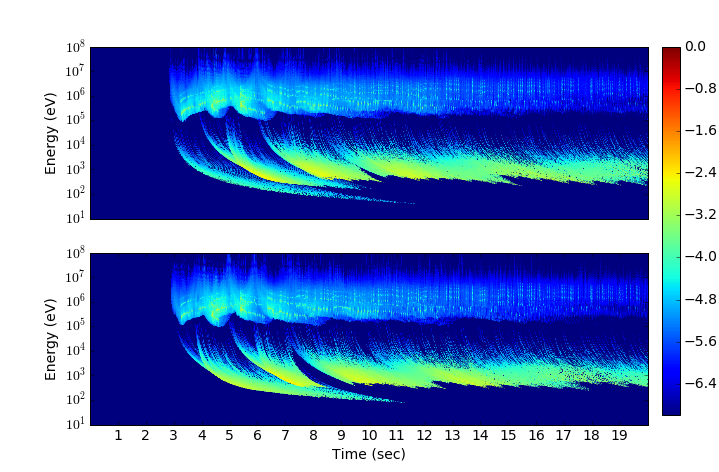

-2.3515900391
-7.0
0.00526976805411
473481
(32, 512, 2000)
Max N (deg):  0.19515983551
Max S (deg):  0.148391421699


<IPython.core.display.Javascript object>


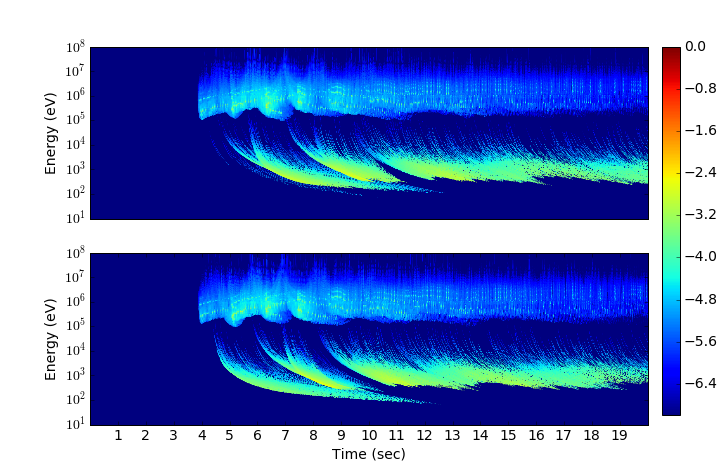

-2.46768750385
-7.0
0.00332137523063
410570
(32, 512, 2000)
Max N (deg):  0.0907450615126
Max S (deg):  0.0759921776271


<IPython.core.display.Javascript object>


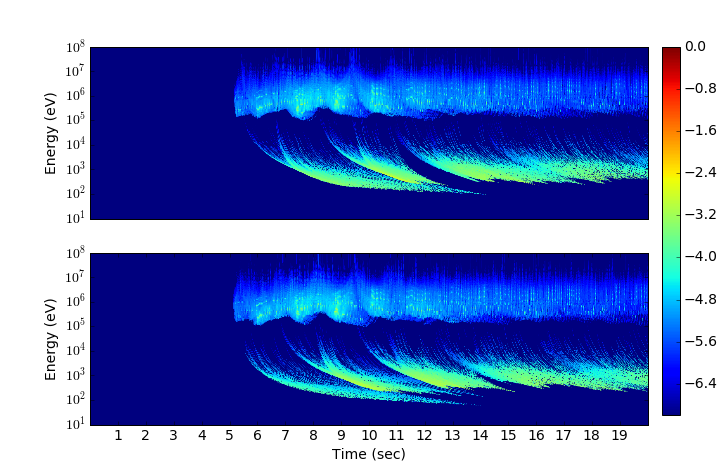

-2.70158008612
-7.0
0.00184526393947
353041
(32, 512, 2000)
Max N (deg):  0.0470798037905
Max S (deg):  0.0609843842827


<IPython.core.display.Javascript object>


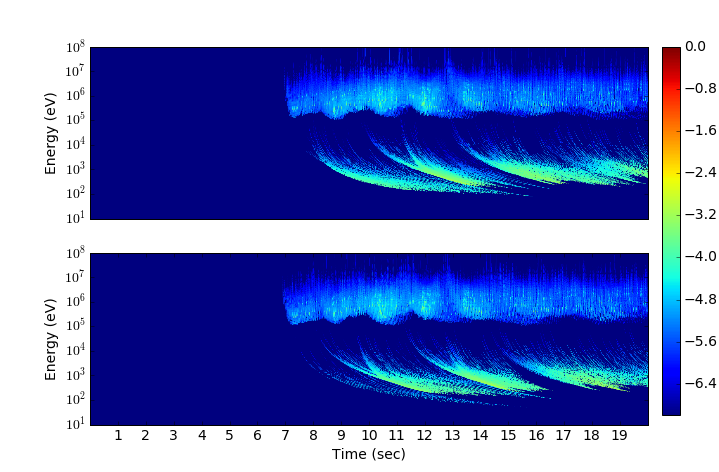

-2.96029195193
-7.0
0.00144646683082
291027


In [6]:
from coordinate_structure import coordinate_structure # My coordinate transformations

sc = load_sim_constants('codesrc/consts.h')

# print sc.NUM_E
# print sc.NUM_STEPS
Ls = [1.07, 1.13, 1.22, 1.33, 1.49, 1.7, 2, 2.42, 3.04]
inlats = [30]

root_dir = '/shared/users/asousa/WIPP/WIPPv4/outputs/agu2016_kp0_v2/'

out_lats = np.arange(20, 60)
cs = coordinate_structure(out_lats, [0], [100],'geomagnetic')
cs.transform_to('L_dipole')
Ls = np.round(100.*cs.L())/100.


if not os.path.exists(os.path.join(root_dir, 'figures')):
    os.mkdir(os.path.join(root_dir, 'figures'))
    
for inlat in inlats:
    for L_ind, L in enumerate(Ls):
        directory = os.path.join(root_dir,'pwr_-10000/in_%g/out_%g/'%(inlat,L) )
#         print os.listdir(directory)

#         print sc.NUM_E, sc.NUM_STEPS
        pN, pS = load_pfiles(directory, L, fmin=0, fmax=40000)

        print np.shape(pN)
        print "Max N (deg): ", np.max(180./np.pi*np.sqrt(pN))
        print "Max S (deg): ", np.max(180./np.pi*np.sqrt(pS))
        plot_pN_pS(np.sqrt(np.sum(pN, axis=0)), np.sqrt(np.sum(pS, axis=0)), sc)
        plt.suptitle('in %g deg, lat = %g, L = %g'%(inlat, out_lats[L_ind], L))
        plt.savefig(os.path.join(root_dir,'figures/p_in%g_L%g.png'%(inlat, out_lats[L_ind] )) )
        plt.close('all')

In [4]:
# from calc_scattering import calc_scattering
# import sim_consts as sc
import time
from matplotlib.colors import LogNorm

# ----------------------------------------------------------------------------
# Plot a single time-energy deflection matrix
# ----------------------------------------------------------------------------

def plot_pN_pS(pN, pS, sc):
#     pN_file=os.path.join(directory, 'pN%g_%g.dat'%(f,L))
#     pS_file=os.path.join(directory, 'pS%g_%g.dat'%(f,L))

#     # This version for text files
#     pN = np.loadtxt(pN_file)
#     pS = np.loadtxt(pS_file)
#     #pN = np.flipud(pN)
#     #pS = np.flipud(pS)

    tvec = np.linspace(sc.T_STEP,sc.T_MAX,sc.NUM_STEPS)

    clims = [-7, 0]


    pN_P = np.log10(pN)
    np.clip(pN_P,clims[0],clims[1],out=pN_P)

    pS_P = np.log10(pS)
    np.clip(pS_P,clims[0],clims[1],out=pS_P)

    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    # The goods
    p1 = ax1.imshow(pN_P,origin='lower',aspect='auto')
    p1.set_clim(clims)
    p2 = ax2.imshow(pS_P,origin='lower',aspect='auto')
    p2.set_clim(clims)

    # Colorbar
#    cax = fig.add_axes([0.77, 0.12, 0.025, 0.78])
    cax = fig.add_axes([0.92, 0.12, 0.025, 0.78])
    fig.colorbar(p1,cax=cax)

    # Label axes
    
    tlabels = np.arange(1,np.floor(sc.T_MAX))
    tinds =  [np.argmax(tt <= tvec) for tt in tlabels]
    ax2.set_xticks(tinds)
    tlabel_strings = ['%d'%k for k in tlabels]
    ax2.set_xticklabels(tlabel_strings)
    

    ax1.get_xaxis().set_visible(False)
#     ax2.set_xticks(np.floor(np.linspace(0,sc.NUM_STEPS-1,sc.T_MAX + 1)))
#     ax2.set_xticklabels(np.floor(tvec[ax2.get_xticks().astype(int)]))

    # Label each power of 10
    logvals = np.arange(np.log10(sc.E_MIN), np.log10(sc.E_MAX)+1)
    einds =  [np.argmax(lv <= np.log10(sc.E_tot_arr)) for lv in logvals]
    einds[-1] = sc.NUM_E - 1 

    ylabel_strings = ['$10^%d$'%k for k in logvals]
    ax1.set_yticks(einds)
    ax1.set_yticklabels(ylabel_strings)
    ax2.set_yticks(einds)
    ax2.set_yticklabels(ylabel_strings)
    ax2.set_xlabel('Time (sec)')
    ax1.set_ylabel('Energy (eV)')
    ax2.set_ylabel('Energy (eV)')

#     fig.subplots_adjust(hspace=0.03, wspace=0.05)
    fig.canvas.draw()
    plt.show()

    print np.max(pN_P)
    print np.min(pN_P)
    print np.max(pS)
    print sum(sum((pN!=0)))

# plot_pN_pS(np.sqrt(np.sum(pN, axis=0)), np.sqrt(np.sum(pS, axis=0)), sc)

In [35]:
L = 3
directory = '/Users/austin/FUSE/shared/users/asousa/WIPP/WIPPy/python/c/out_binfiles/' 

pN, pS = load_pfiles(directory, L)

print np.shape(pN)

plot_pN_pS(np.sqrt(np.sum(pN, axis=0)), np.sqrt(np.sum(pS, axis=0)), sc)

IOError: [Errno 2] No such file or directory: '/Users/austin/FUSE/shared/users/asousa/WIPP/WIPPy/python/c/out_binfiles/pN0_3.dat'

In [ ]:
np.shape(pN)

plot_pN_pS(np.sum(pN, axis=0), np.sum(pS, axis=0), sc)

In [ ]:
import sim_consts as sc
from matplotlib.colors import LogNorm


pN_sum = np.sqrt(np.sum(pN, axis=0))
pS_sum = np.sqrt(np.sum(pS, axis=0))


clims = [0.1,2]
tvec = np.linspace(0,sc.T_MAX,sc.NUM_STEPS)

plt.figure()
# plt.imshow(pS_sum)
# plt.subplot(211)
# plt.imshow(pN_sum)
plt.pcolor(tvec, sc.E_tot_arr*1e-6, pS_sum,  norm=LogNorm(vmin=clims[0], vmax=clims[1]))
plt.clim(clims)
plt.colorbar()
# plt.subplot(212)
#plt.imshow(pS_sum)
# plt.pcolor(tvec, sc.E_tot_arr, pS_sum)


print np.max(pN_sum)
print np.max(pS_sum)
print sum(sum(sum(np.isnan(pN))))
print sum(sum(sum(np.isnan(pS))))





In [ ]:
print sc.E_MIN
print sc.E_MAX

print np.log10(sc.E_MAX)
print np.log10(sc.E_MIN)

logvals = np.arange(np.log10(sc.E_MIN), np.log10(sc.E_MAX)+1)

#inds = find(sc.E_tot_arr > logvals)

#einds = [np.where(lv > np.log10(sc.E_tot_arr))[0][-1] for lv in logvals]
einds =  [np.argmax(lv <= np.log10(sc.E_tot_arr)) for lv in logvals]
einds[-1] = sc.NUM_E - 1 

print einds

In [ ]:
np.arange(0,100,step=0.5)

In [85]:
tmp = np.fromfile('/shared/users/asousa/WIPP/WIPPv4/outputs/agu2016_kp0/pwr_-100000/in_30/out_1.7/pN200_1.7.dat')

tmp = 


(256000,)
